# twiter sentiment analysis 

In [108]:
# for using regular expressiion
import re

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#for plotting seaborn plots
import seaborn as sns

#The string module contains a number of useful constants and classes
import string

#NLTK is a leading platform for building Python programs to work 
#with human language data. It provides easy-to-use interfaces to 
#over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for 
#classification, tokenization, stemming, tagging, parsing, 
#and semantic reasoning, wrappers for industrial-strength NLP 
#libraries, and an active discussion forum.

import nltk

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#When using the 'inline' backend, so that matplotlib graphs will be included in notebook,
%matplotlib inline

### loading data sets

In [109]:
train  = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [110]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### For convenience only, let’s first combine train and test set. 

### This saves the trouble of performing the same steps twice on test and train.


In [111]:
combi = train.append(test, ignore_index=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)



so the data has 3 columns id, label, and tweet. 

label is the binary target variable and tweet contains the tweets that is to be  cleaned and preprocessed

so we will work on 

1.Removing Twitter Handles (@user)

## Removing Twitter Handles (@user)
### we are going to use regular expression here

In [112]:
#a user-defined function to remove unwanted text patterns from the tweets.
#inputs -- two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string.
#outputs - -returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'', input_txt)
        
    return input_txt 

In [113]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [114]:
# checking the changes in the data
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Removing Punctuations, Numbers, and Special Characters

In [115]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

### removing short words (0f <3 characters)


In [116]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [117]:
# lets see the changes in the dataset
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Tokenization

tokenize all the cleaned tweets in our dataset.

Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [118]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

### Stemming


Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [119]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])    # stemming


tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [120]:
#snitch these tokens back togather
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])


combi['tidy_tweet'] = tokenized_tweet

## Story generation and visualization from tweets
try to answer 

these questions


What are the most common words in the entire dataset?


What are the most common words in the dataset for negative and positive tweets, respectively?


How many hashtags are there in a tweet?


Which trends are associated with my dataset?


Which trends are associated with either of the sentiments? Are they compatible with the sentiments?
 

### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

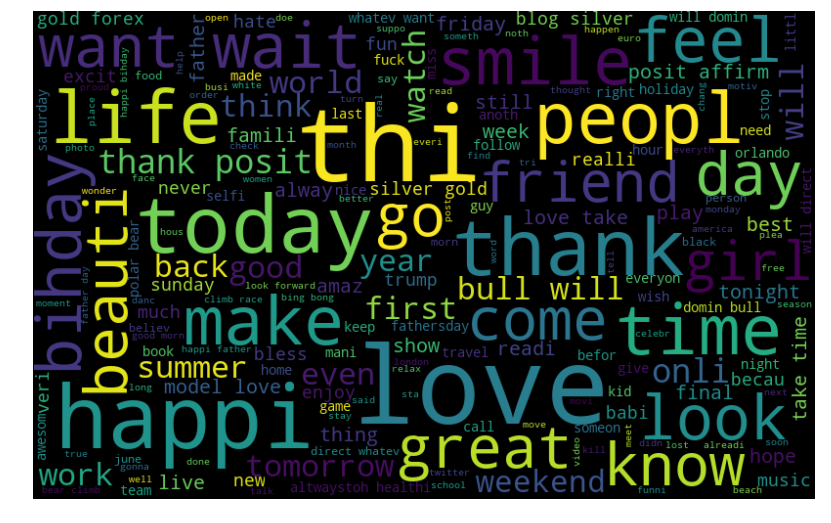

In [121]:
# common words

all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

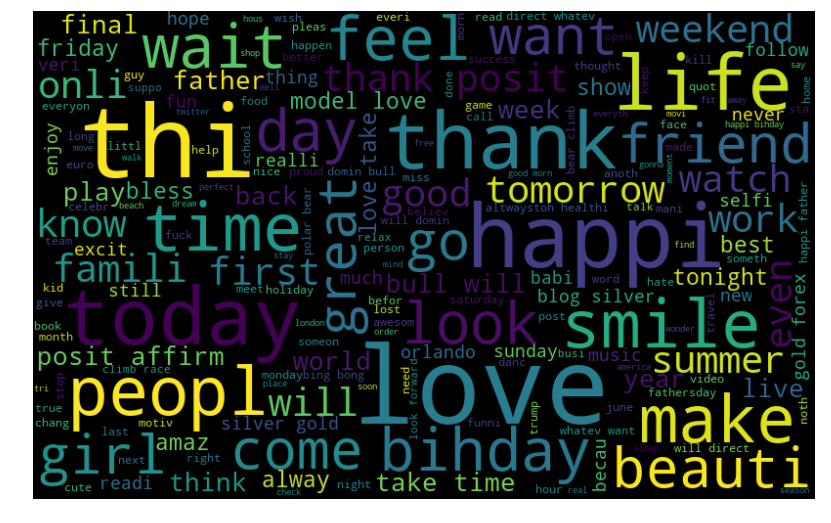

In [122]:
## non resisit or normal words

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(14,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

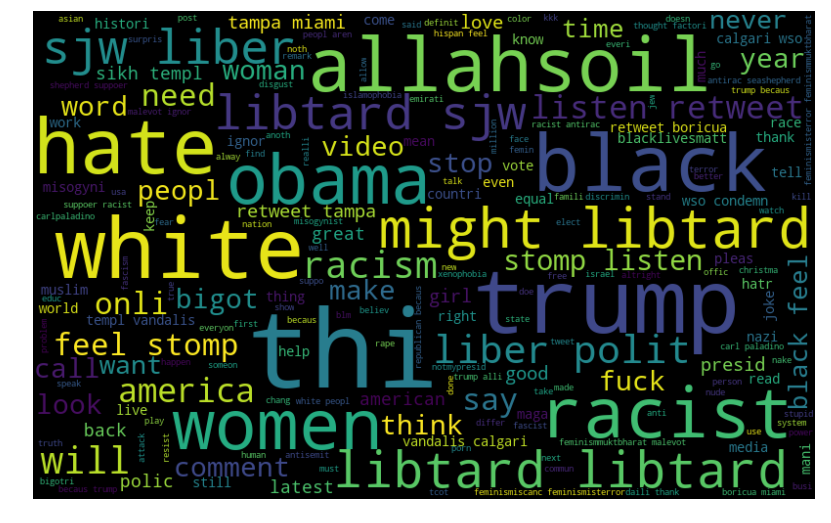

In [123]:
# rasisit or negative words

negative_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(14,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### impact of hashtag on tweets sentiment

In [124]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [125]:

# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### plotting positive hashtags

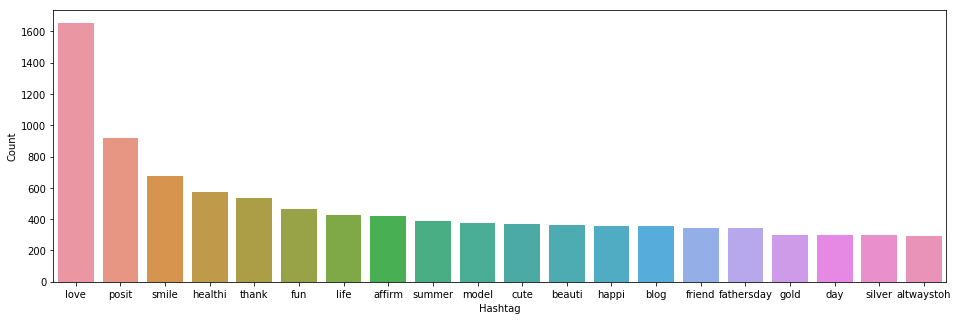

In [126]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### plotting negative hashtags

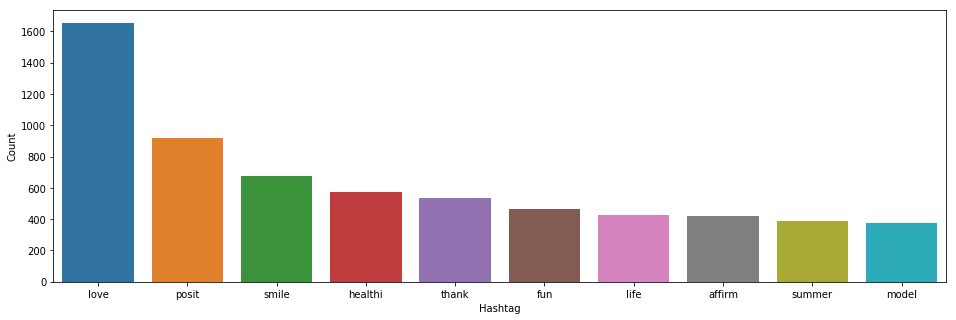

In [127]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags   


e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Extracting features fromm cleaned words
To analyze a preprocessed data, it needs to be converted into features.


Depending upon the usage, text features can be constructed using assorted 


techniques – Bag-of-Words, TF-IDF, and Word Embeddings.

In [128]:
# Applying Bag-of-words


from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [129]:
# Applying TF-IDF 


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

## Model Building: Sentiment Analysis


### using Bag-of-words

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

### using IF-IDF
    

In [ ]:
# Building model using TF-IDF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)